## Lab2演示

In [1]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

from util.transform import transform

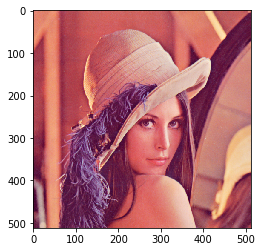

In [2]:
lena = plt.imread('../img/lena.tiff')
lena_gray = cv2.imread('../img/lena.tiff', 0)
plt.imshow(lena)

#### 1. 直方图

##### 1.1 直方图均衡化

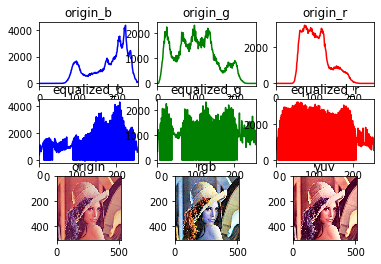

In [3]:
from lab2.equalization import *


color = ('b', 'g', 'r')

channels = cv2.split(lena)
channels_ = np.zeros((3, 512, 512), dtype=np.uint8)
for k, col in enumerate(color):
    hist_r = histogram(channels[k])
    plt.subplot(3, 3, k + 1), plt.plot(hist_r, color=col), plt.title('origin_{}'.format(col)), plt.xlim([0, 256])

for k, col in enumerate(color):
    channels_[k] = equalize(channels[k])
    hist_ = histogram(channels_[k])
    plt.subplot(3, 3, k + 4), plt.plot(hist_, color=col), plt.title('equalized_{}'.format(col)), plt.xlim([0, 256])
lena_gbr = channels_.transpose((1, 2, 0))

lena_yuv = cv2.cvtColor(lena, cv2.COLOR_RGB2YUV)
lena_yuv[:, :, 0] = equalize(lena_yuv[:, :, 0])
lena_yuv = cv2.cvtColor(lena_yuv, cv2.COLOR_YUV2BGR)

plt.subplot(3, 3, 7), plt.title('origin'), plt.imshow(lena)
plt.subplot(3, 3, 8), plt.title('rgb'), plt.imshow(transform(lena_gbr))
plt.subplot(3, 3, 9), plt.title('yuv'), plt.imshow(transform(lena_yuv))
plt.show()

##### 1.2 直方图规定化

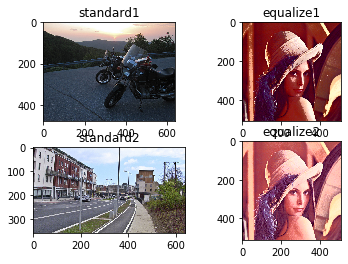

In [4]:
standard1 = cv2.imread('../img/equalization/standard1.jpg')
standard2 = cv2.imread('../img/equalization/standard2.jpg')
standard1 = cv2.cvtColor(standard1, cv2.COLOR_BGR2YUV)
standard2 = cv2.cvtColor(standard2, cv2.COLOR_BGR2YUV)

lena_yuv1 = cv2.cvtColor(lena, cv2.COLOR_RGB2YUV)
lena_yuv1[:, :, 0] = equalize(lena_yuv1[:, :, 0], standard1[:, :, 0])
lena_yuv2 = cv2.cvtColor(lena, cv2.COLOR_RGB2YUV)
lena_yuv2[:, :, 0] = equalize(lena_yuv2[:, :, 0], standard2[:, :, 0])

plt.subplot(221), plt.title('standard1'), plt.imshow(cv2.cvtColor(standard1, cv2.COLOR_YUV2RGB))
plt.subplot(222), plt.title('equalize1'), plt.imshow(cv2.cvtColor(lena_yuv1, cv2.COLOR_YUV2RGB))
plt.subplot(223), plt.title('standard2'), plt.imshow(cv2.cvtColor(standard2, cv2.COLOR_YUV2RGB))
plt.subplot(224), plt.title('equalize2'), plt.imshow(cv2.cvtColor(lena_yuv2, cv2.COLOR_YUV2RGB))
plt.show()

#### 2. 同态滤波

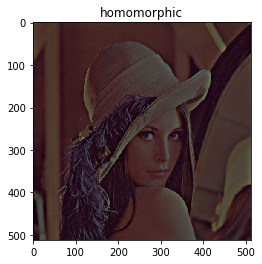

In [5]:
from lab2.homomorphic import homomorphic_filter


hom = np.zeros(lena.shape, dtype=np.uint8)
for i in range(3):
    hom[:, :, i] = homomorphic_filter(lena[:, :, i])

plt.title('homomorphic')
plt.imshow(hom)

##### 附：傅里叶变换

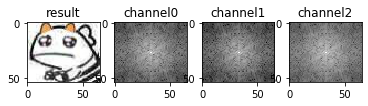

In [6]:
from lab2.dft import *


image = cv2.imread("../img/homomorphic/test.jpg")
dft_img = dft(image)
i_dft_img = i_dft(dft_img)

map_img0 = dft_map(dft_shift(dft_img[:, :, 0]))
map_img1 = dft_map(dft_shift(dft_img[:, :, 1]))
map_img2 = dft_map(dft_shift(dft_img[:, :, 2]))

plt.subplot(141), plt.imshow(transform(i_dft_img)), plt.title('result')
plt.subplot(142), plt.imshow(map_img0, cmap='gray'), plt.title('channel0')
plt.subplot(143), plt.imshow(map_img1, cmap='gray'), plt.title('channel1')
plt.subplot(144), plt.imshow(map_img2, cmap='gray'), plt.title('channel2')
plt.show()

#### 3. 双边滤波

start channel 0
finished
start channel 1
finished
start channel 2
finished


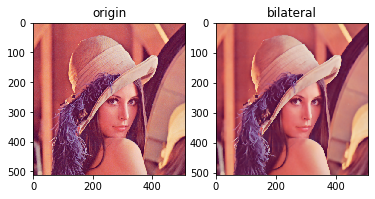

In [7]:
from lab2.bilateral import bilateral_filter


channels = cv2.split(lena)

Size = 5
img = np.zeros((lena.shape[0] - Size + 1, lena.shape[1] - Size + 1, 3), dtype=np.uint8)
for c in range(3):
    print('start channel {}'.format(c))
    img[:, :, c] = bilateral_filter(channels[c], Size, 5, 30)
    print('finished')

plt.subplot(121), plt.imshow(lena), plt.title('origin')
plt.subplot(122), plt.imshow(img), plt.title('bilateral')
plt.show()